# Notebook für Exercise 9

In dieser Übung wollen wir die grundlegende Regression behandeln.
Als Beispieldaten verwenden wir Daten von Kraftfahrzeugen.
An diesen Daten soll der Zusammenhang der Kraftstoffeffizienz und verschiedener
Kraftfahrzeugeigenschaften berechnet werden.

In [1]:
## Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.set_printoptions(precision=3, suppress=True)
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing

from matplotlib import pyplot as plt

Verwenden Sie folgende Url: ['http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data']('http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data').

Laden Sie mit der Pandas-Funktion read_csv die Daten.

In [2]:
# Laden der Daten von Url mit Benennung der Spalten
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv( url , names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
dataset = raw_dataset.copy()
#plt.title('Distribution of stds of all columns');
dataset.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


### Aufgabe 1
Bei frei verfügbaren Datensets gibt es oft das Problem, dass Werte in den Spalten fehlen. Damit bei den späteren Berechnungen
keine Fehler entstehen ist es also notwendig die Daten zu bereinigen. Am Einfachsten wirft man unvollständige Daten weg.
Bereinigen Sie die Daten von fehlerhaften Einträgen. Am einfachsten funktioniert dies mit den Methoden  *pandas.DataFrame.dropna()* bzw *.isna()*

In [3]:
dataset=pd.DataFrame.dropna(dataset)

### Aufgabe 2
Oftmals sind in den Daten Werte kategorisch. Es bietet Sich an diese in ein "one-hot" umzuwandeln.
In diesen Daten ist die Herkunft ('Origin') kategorisch. Ordnen Sie die Daten als "one-hot" verschiedenen Spalten zu ('USA'=1 , 'Europe'=2, 'Japan=3').

In [4]:
# Verwandlung von kategorischen Daten und "one-hot"
originOneHot = pd.get_dummies(dataset['Origin'])
#print(originOneHot)
datasetWithoutOrigin=dataset.drop(['Origin'], axis=1)
datasetOneHotEncoded=datasetWithoutOrigin.assign(USA=originOneHot[1], Europe=originOneHot[2], Japan=originOneHot[3])
print(datasetOneHotEncoded)
#Nötig, da sonst Herkunftsländer eine Gewichtung hätten

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  USA  Europe  Japan  
0            70    1       0      0  
1            70    1       0      0  
2            70    1 

### Aufgabe 3
Nun haben wir die Daten in einer verarbeitbaren Form. Teilen Sie die Daten in ein Trainings- und Testset auf. Gehen Sie dabei randomisiert vor.

In [5]:
# Aufteilen der Daten in Train- und Testset
from sklearn.model_selection import train_test_split

(Xtr, Xte) = train_test_split(datasetOneHotEncoded)
print(Xtr.shape)
print(Xte.shape)
print(Xtr.head())

(294, 10)
(98, 10)
      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
225  17.5          6         250.0       110.0  3520.0          16.4   
38   14.0          8         350.0       165.0  4209.0          12.0   
175  29.0          4          90.0        70.0  1937.0          14.0   
203  29.5          4          97.0        71.0  1825.0          12.2   
178  23.0          4         120.0        88.0  2957.0          17.0   

     Model Year  USA  Europe  Japan  
225          77    1       0      0  
38           71    1       0      0  
175          75    0       1      0  
203          76    0       1      0  
178          75    0       1      0  


### Aufgabe 4
Im Allgemeinen verschafft man sich beim Aufbau eines Regressionssystems einen Überblick über die Daten.
Plotten Sie in einer Scattermatrix die Korrellationen der Verschiedenen Daten zueinander, mit Focus auf die Kraftstoffeffizienz ('MPG')
Dies kann mit der Pandas-Funtion plotting.scatter_matrix geschehen. Es sollen 'MPG' , 'Cylinders' , 'Displacement' ,  'Horsepower' zueinander korrelliert werden.

array([[<AxesSubplot:xlabel='MPG', ylabel='MPG'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='MPG'>,
        <AxesSubplot:xlabel='Displacement', ylabel='MPG'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='MPG'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Cylinders'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Displacement'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Horsepower'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Horsepower'>]],
      dtype=object)

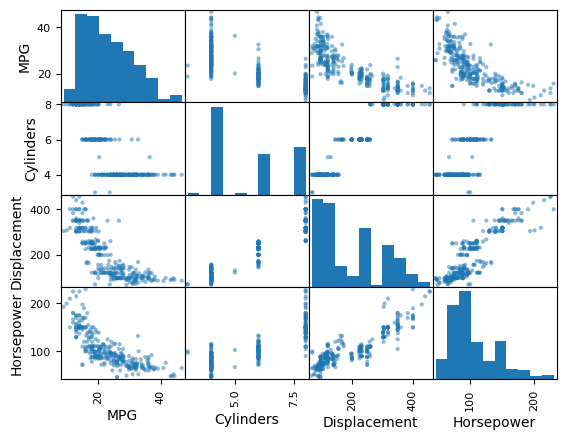

In [6]:
df = pd.DataFrame(Xtr, columns=['MPG', 'Cylinders', 'Displacement', 'Horsepower'])
pd.plotting.scatter_matrix(df)

In [7]:
# Anzeigen der Statistik
Xtr.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,23.230272,5.523810,195.750000,103.959184,2992.605442,15.630272,75.986395,0.632653,0.176871,0.190476
std,7.685757,1.702571,101.707921,36.859826,830.135534,2.748602,3.641787,0.482904,0.382210,0.393346
min,9.000000,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.000000,4.000000,107.000000,75.250000,2257.250000,13.725000,73.000000,0.000000,0.000000,0.000000
50%,22.000000,4.500000,151.000000,95.000000,2869.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,28.075000,8.000000,293.250000,125.000000,3612.000000,17.275000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,1.000000,1.000000,1.000000


### Aufgabe 5
Wenn wir eine Regression berechnen wollen müssen wir den Zielwert von den Daten trennen. Trennen Sie den Zielwert ('MPG') von den Daten.

In [8]:
ytr = Xtr['MPG']
print(ytr)
Xtr = Xtr.drop('MPG', axis=1)
Xtr.describe()

225    17.5
38     14.0
175    29.0
203    29.5
178    23.0
       ... 
227    19.0
392    27.0
69     12.0
115    15.0
134    16.0
Name: MPG, Length: 294, dtype: float64


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000,294.000000
mean,5.523810,195.750000,103.959184,2992.605442,15.630272,75.986395,0.632653,0.176871,0.190476
std,1.702571,101.707921,36.859826,830.135534,2.748602,3.641787,0.482904,0.382210,0.393346
min,3.000000,68.000000,46.000000,1649.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,107.000000,75.250000,2257.250000,13.725000,73.000000,0.000000,0.000000,0.000000
50%,4.500000,151.000000,95.000000,2869.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,8.000000,293.250000,125.000000,3612.000000,17.275000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,230.000000,4997.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [9]:
yte = Xte['MPG']
print(yte)
Xte = Xte.drop('MPG', axis=1)
Xte.describe()

128    15.0
368    27.0
315    24.3
125    20.0
223    15.5
       ... 
304    37.3
25     10.0
150    26.0
342    30.0
232    16.0
Name: MPG, Length: 98, dtype: float64


,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000,98.000000
mean,5.316327,190.397959,106.000000,2932.520408,15.274490,75.959184,0.602041,0.163265,0.234694
std,1.714685,113.453268,43.185526,907.707799,2.786503,3.825898,0.491994,0.371508,0.425986
min,3.000000,70.000000,52.000000,1613.000000,8.500000,70.000000,0.000000,0.000000,0.000000
25%,4.000000,97.000000,75.250000,2161.250000,13.825000,73.000000,0.000000,0.000000,0.000000
50%,4.000000,145.000000,92.000000,2720.000000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,6.000000,259.000000,126.250000,3631.750000,16.975000,79.000000,1.000000,0.000000,0.000000
max,8.000000,455.000000,225.000000,5140.000000,23.500000,82.000000,1.000000,1.000000,1.000000


### Aufgabe 6
Die Daten in den verschiedenen Spalten sind sehr unterschiedlich skalliert. Während die Herkunftswerte nur 0 und 1 annehmen sind die Gewichtswert meist über 1000.
Dies misst den verschiedenen Werten somit unterschiedliche Gewichtungen zu. Um dies zu vermeiden werden die Werte normalisiert, auf das Intervall zwischen '0' und '1'.
Normalisieren Sie die Werte. Dazu finden Sie in `preprocessing` eine passende Funktion.

In [19]:
"""def normData(Xtr):
    norm = preprocessing.Normalization(axis=None)
    norm.adapt(Xtr)
    XtrNorm=norm(Xtr)
    #print(XtrNorm)
    XtrNorm = (XtrNorm + 1)/2 #Normalization layer normalizes only on a scale [-1,1]. To get this to [0,1] adjust the values as seen
    #print(XtrNorm)
    XtrNormDataframe = pd.DataFrame(XtrNorm, columns=['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'])
    #print(XtrNormDataframe)
    return XtrNormDataframe"""

### Aufgabe 7
Nun sind die Daten bereit für eine Regressionsanalyse.

Verwenden wir zunächst nur einen Wert und berechnen eine Lineare Regression. Wir setzen 'MPG' und 'Horsepower' in Beziehung.
Extrahieren Sie 'Horsepower' aus den Trainingsdaten, normalisieren sie die Daten und bauen Sie ein einfaches lineares System (neuronales Netz mit einem Knoten zur Regressionsanalyse) auf und trainieren Sie dieses.

In [37]:
HorsepowerTr=np.array(Xtr['Horsepower'])
print(HorsepowerTr)
horsepowerNorm = preprocessing.Normalization(input_shape=[1,], axis=None)
horsepowerNorm.adapt(HorsepowerTr) #Creating Nomralizing layer

hpModel = tf.keras.Sequential([horsepowerNorm, layers.Dense(units=1)])
hpModel.summary()

hpModel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                loss="mean_absolute_error")


[110. 165.  70.  71.  88.  95.  62.  68.  87.  95.  75.  88.  96.  80.
 152.  71.  76.  70.  95. 110. 155. 180. 167. 110. 130. 110. 145. 105.
  75.  90. 100.  95. 230. 140.  90.  63.  48. 150. 110.  92. 125. 153.
  95.  97.  83. 150.  79. 130. 103.  85.  67. 139. 130. 132.  90.  95.
  70. 145.  80.  66.  86. 139.  78.  75. 105.  97. 110.  83.  60. 130.
  88. 150.  90. 100.  88.  72. 138.  72.  90.  82. 100.  85. 175.  87.
  84.  71.  92. 180.  85. 125.  65.  85.  80.  97. 112.  81. 125. 100.
 105. 150. 135. 150.  90.  88.  72.  88.  67. 180. 170. 100. 145. 165.
  78. 120.  79.  89.  65.  65.  52. 150.  68.  81.  84.  75. 120. 105.
  80.  67.  72. 129.  88. 100. 110.  65.  48.  67. 225.  63. 115. 198.
  90. 150.  90. 215. 120.  70.  65.  67. 153. 170.  65. 150. 150. 175.
 160. 150. 140.  88. 210.  49. 110.  97. 170. 110. 110.  76.  86.  46.
 100.  84. 115.  69. 110. 150.  84.  60.  90.  63.  85. 150.  65.  68.
 193.  60.  61.  95. 110.  52.  68.  97.  86.  80.  48.  95. 100.  64.
  76. 

In [38]:
learnHis=hpModel.fit(HorsepowerTr, ytr, epochs=100, validation_split = 0.2)
#Loss geht runter ist gut. Accuracy hier schwer/nicht anzeigbar, weil kein Klassifikationsproblem

Epoch 1/100
8/8 [==============================] - 0s 13ms/step - loss: 23.0232 - val_loss: 22.0158
Epoch 2/100
8/8 [==============================] - 0s 4ms/step - loss: 22.2164 - val_loss: 21.2157
Epoch 3/100
8/8 [==============================] - 0s 4ms/step - loss: 21.4173 - val_loss: 20.4157
Epoch 4/100
8/8 [==============================] - 0s 3ms/step - loss: 20.6166 - val_loss: 19.6152
Epoch 5/100
8/8 [==============================] - 0s 4ms/step - loss: 19.8173 - val_loss: 18.8150
Epoch 6/100
8/8 [==============================] - 0s 4ms/step - loss: 19.0161 - val_loss: 18.0151
Epoch 7/100
8/8 [==============================] - 0s 4ms/step - loss: 18.2163 - val_loss: 17.2149
Epoch 8/100
8/8 [==============================] - 0s 3ms/step - loss: 17.4171 - val_loss: 16.4149
Epoch 9/100
8/8 [==============================] - 0s 4ms/step - loss: 16.6157 - val_loss: 15.6144
Epoch 10/100
8/8 [==============================] - 0s 3ms/step - loss: 15.8196 - val_loss: 14.8137
Epoch 11

In [39]:
def plot_lossAndValLoss(learnHis):
    plt.plot(learnHis.history['loss'], label='loss')
    plt.plot(learnHis.history['val_loss'], label='val_loss')
    plt.ylim([0,10])
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    

### Aufgabe 8
Zeigen Sie nun wie gut das lineare System auf die Daten fittet. Plotten Sie die Daten und das lineare Ergebnis.

(294,)


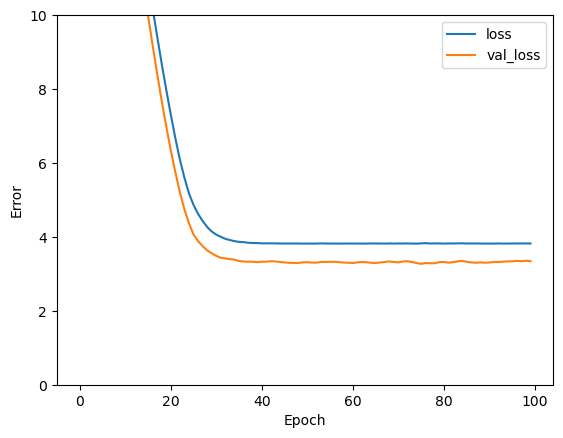

In [41]:
plot_lossAndValLoss(learnHis)

10/10 [==============================] - 0s 776us/step


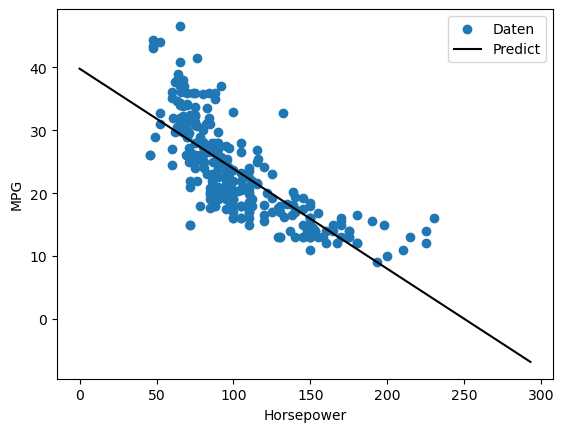

In [43]:
plt.scatter(HorsepowerTr, ytr, label='Daten')
plt.plot(tf.linspace(0.0, 293, 294), hpModel.predict(tf.linspace(0.0, 293, 294)), color='black', label='Predict')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()

### Aufgabe 9
Nun versuchen wir die Daten nichtlinear zu fitten. Dazu benötigen wir ein nichlineares System, also ein mehrschichtiges Neuronales Netz.

Erstellen Sie für die 'MPG','Horsepower'-Daten ein DNN und Plotten Sie die Daten wieder.

### Aufgabe 10
Nun wollen wir alle Daten unseres Datensets miteinbeziehen und sehen ob wir den Fehler nicht noch verkleinern können.
Bauen Sie also ein DNN das alle Daten verwendet, trainieren Sie es und ploten Sie den Verlauf Validierungsfehlers und des Trainingsfehlers.

Versuchen Sie nun mit verschiedenen Optimierern die Netze zu trainieren.
Stellen Sie die Ergebnisse zum Vergleich in einem Plot von jeweils Trainingsverlust und Validierungsverlust dar.

In [ ]:
#Bei der Bearbeitung der Aufgabe bin ich auf folgende Webseite gestoßen: https://www.tensorflow.org/tutorials/keras/regression . Wer also eine echte Musterlösung haben möchte, kann sich hieran orientieren